# <center> Kobe Bryant Shot Selection Analysis </center>
### Team Id : PTID-CDS-JAN-25-2375
### Project Id : PRCP-1008-NBAShotSelection

### <center> Exploratory Data Analysis and Ensemble Predication of shot made and missed <center/>  

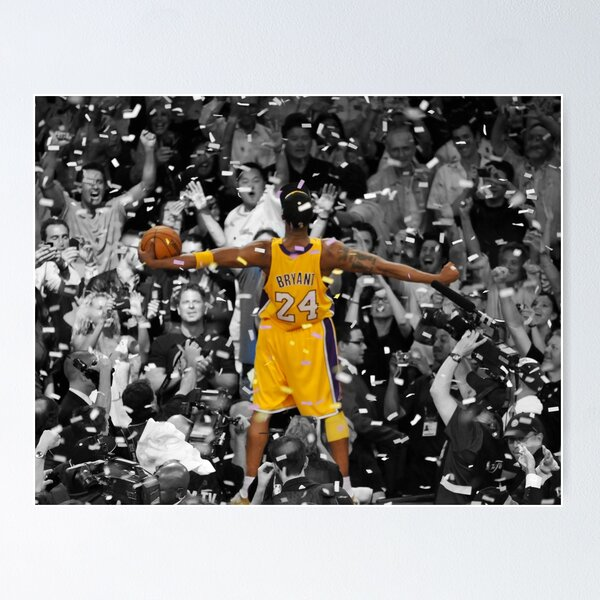

# Dataset Description

- This data contains the location and circumstances of every field goal attempted by Kobe Bryant took during his 20-year career. Your task is to predict whether the basket went in (shot_made_flag).

# Problem Statement :
## Task 1:
#### Prepare a complete data analysis report on the given data.

## Task 2:
#### Help all stakeholders develop more effective game strategies. The  goal is to find the best model that has the highest accuracy and F1-score.

## Task 3:
#### Our objective is to build a shot prediction model, whether the player will score or not score, based on the circumstances under which they are made into consideration. 

# 

# Importing Necessary Libraries 

In [6]:
# For processing the data
import numpy as np
import pandas as pd

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
%matplotlib inline
sns.set_style("white") # set style for seaborn plots

# Machine learning
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2
from sklearn.metrics import make_scorer, log_loss
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (BaggingClassifier, ExtraTreesClassifier, 
                              GradientBoostingClassifier, VotingClassifier, 
                              RandomForestClassifier, AdaBoostClassifier)

# Ignore warnings
import warnings 
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('data.csv')

In [8]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [9]:
df.tail()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
30692,Jump Shot,Jump Shot,397,49900088,33.9963,1,48,-118.2688,6,4,...,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30693
30693,Tip Shot,Tip Shot,398,49900088,34.0443,0,0,-118.2698,6,4,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30694
30694,Running Jump Shot,Jump Shot,426,49900088,33.8783,-134,166,-118.4038,3,4,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30695
30695,Jump Shot,Jump Shot,448,49900088,33.7773,31,267,-118.2388,2,4,...,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30696
30696,Jump Shot,Jump Shot,471,49900088,33.9723,1,72,-118.2688,0,4,...,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30697


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

#### Insight from the (info)
- In this dataset thare are 3 float values, 11 int values and 11 object values 

In [12]:
df.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [13]:
df.dtypes

action_type            object
combined_shot_type     object
game_event_id           int64
game_id                 int64
lat                   float64
loc_x                   int64
loc_y                   int64
lon                   float64
minutes_remaining       int64
period                  int64
playoffs                int64
season                 object
seconds_remaining       int64
shot_distance           int64
shot_made_flag        float64
shot_type              object
shot_zone_area         object
shot_zone_basic        object
shot_zone_range        object
team_id                 int64
team_name              object
game_date              object
matchup                object
opponent               object
shot_id                 int64
dtype: object

First of all, we will transform the `period` column into an `object`. We won't be doing mathematical operations with it, so it is not necessary to maintain it as an integer.

On the other side, there are several variables that can be encoded as `category`. This will let us interact with a more efficient DataFrame in terms of running speed and memory usage.

In [15]:
df['shot_made_flag'].unique()

array([nan,  0.,  1.])

In [16]:
df['period'] = df['period'].astype('object')

vars_category = ['combined_shot_type', 'game_event_id', 'game_id', 'playoffs', 'season', 'shot_made_flag', 'shot_type', 'team_id']

for col in vars_category:
    df[col] = df[col].astype('category')

In [17]:
df.dtypes

action_type             object
combined_shot_type    category
game_event_id         category
game_id               category
lat                    float64
loc_x                    int64
loc_y                    int64
lon                    float64
minutes_remaining        int64
period                  object
playoffs              category
season                category
seconds_remaining        int64
shot_distance            int64
shot_made_flag        category
shot_type             category
shot_zone_area          object
shot_zone_basic         object
shot_zone_range         object
team_id               category
team_name               object
game_date               object
matchup                 object
opponent                object
shot_id                  int64
dtype: object

In [18]:
print("Dimensions of out DataFrame:", df.shape)

Dimensions of out DataFrame: (30697, 25)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   action_type         30697 non-null  object  
 1   combined_shot_type  30697 non-null  category
 2   game_event_id       30697 non-null  category
 3   game_id             30697 non-null  category
 4   lat                 30697 non-null  float64 
 5   loc_x               30697 non-null  int64   
 6   loc_y               30697 non-null  int64   
 7   lon                 30697 non-null  float64 
 8   minutes_remaining   30697 non-null  int64   
 9   period              30697 non-null  object  
 10  playoffs            30697 non-null  category
 11  season              30697 non-null  category
 12  seconds_remaining   30697 non-null  int64   
 13  shot_distance       30697 non-null  int64   
 14  shot_made_flag      25697 non-null  category
 15  shot_type           30697 non-null  

As we knew, `shot_made_flag` has null values corresponding to the test observations. But surprisingly, this is the only variable with missing data, so no imputation will be needed.

In [21]:
df.describe(include=['number'])

,lat,loc_x,loc_y,lon,minutes_remaining,seconds_remaining,shot_distance,shot_id
count,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000
mean,33.953192,7.110499,91.107535,-118.262690,4.885624,28.365085,13.437437,15349.000000
std,0.087791,110.124578,87.791361,0.110125,3.449897,17.478949,9.374189,8861.604943
min,33.253300,-250.000000,-44.000000,-118.519800,0.000000,0.000000,0.000000,1.000000
25%,33.884300,-68.000000,4.000000,-118.337800,2.000000,13.000000,5.000000,7675.000000
50%,33.970300,0.000000,74.000000,-118.269800,5.000000,28.000000,15.000000,15349.000000
75%,34.040300,95.000000,160.000000,-118.174800,8.000000,43.000000,21.000000,23023.000000
max,34.088300,248.000000,791.000000,-118.021800,11.000000,59.000000,79.000000,30697.000000


In [22]:
df.describe(include = ['object', 'category'])

,action_type,combined_shot_type,game_event_id,game_id,period,playoffs,season,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent
count,30697,30697,30697,30697,30697,30697,30697,25697.0,30697,30697,30697,30697,30697,30697,30697,30697,30697
unique,57,6,620,1559,7,2,20,2.0,2,6,7,5,1,1,1559,74,33
top,Jump Shot,Jump Shot,2,21501228,3,0,2005-06,0.0,2PT Field Goal,Center(C),Mid-Range,Less Than 8 ft.,1610612747,Los Angeles Lakers,2016-04-13,LAL @ SAS,SAS
freq,18880,23485,132,50,8296,26198,2318,14232.0,24271,13455,12625,9398,30697,30697,50,1020,1978


#### Some exploration

In this section, we will further explore our dataset. Primarily, we will display visualizations, which are a very effective way to get insights into our data.

Similarly, we will try to identify variables that can have a significant impact on the explainability of our dependant variable: `shot_made_flag`. We start with our target class distribution:

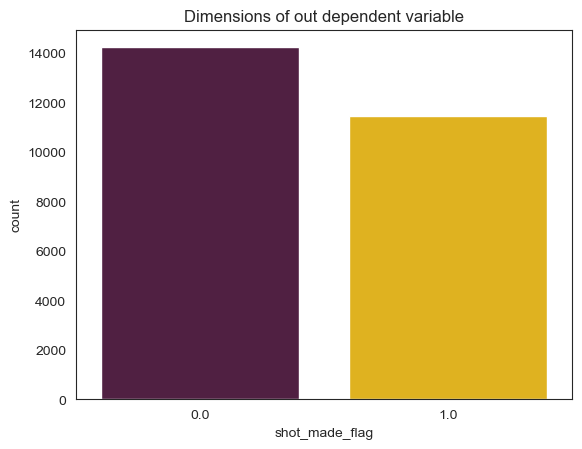

In [24]:
ax = plt.axes()
sns.countplot(x='shot_made_flag', data=df, ax=ax, palette=('#581845', '#FFC300'))
ax.set_title('Dimensions of out dependent variable')
plt.show()

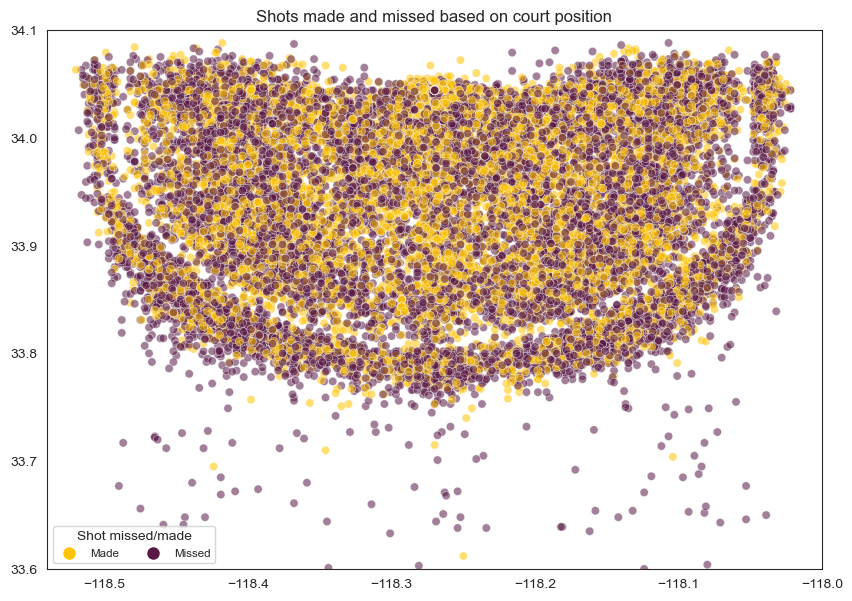

In [25]:
fig, ax = plt.subplots(figsize=(10, 7))
scatter = sns.scatterplot(x=df["lon"], y=df["lat"], hue=df['shot_made_flag'],
                                    alpha=0.55, ax=ax, palette=('#581845', '#FFC300'))
scatter.set_xlim(left=-118.54, right=-118)
scatter.set_ylim(bottom=33.6, top=34.1)
ax.set_title("Shots made and missed based on court position")
ax.set_xlabel("")
ax.set_ylabel("")
legend_elemnts = [Line2D([0], [0], marker="o", color='w', label="Made",
                         markerfacecolor='#FFC300', markersize=10),
                  Line2D([0], [0], marker="o", color='w', label="Missed",
                         markerfacecolor='#581845', markersize=10)]
plt.legend(handles=legend_elemnts, title="Shot missed/made", 
           ncol=2, fontsize='small', fancybox=True);

Note that there is a clear cluster of points made next to the basket. On the other hand, there is a clear trend in the central area: it seems that Kobe was more accurate there. I think the right side of the court has a little bit more yellow in it, less perceptible though. Let us check these two last assumptions:

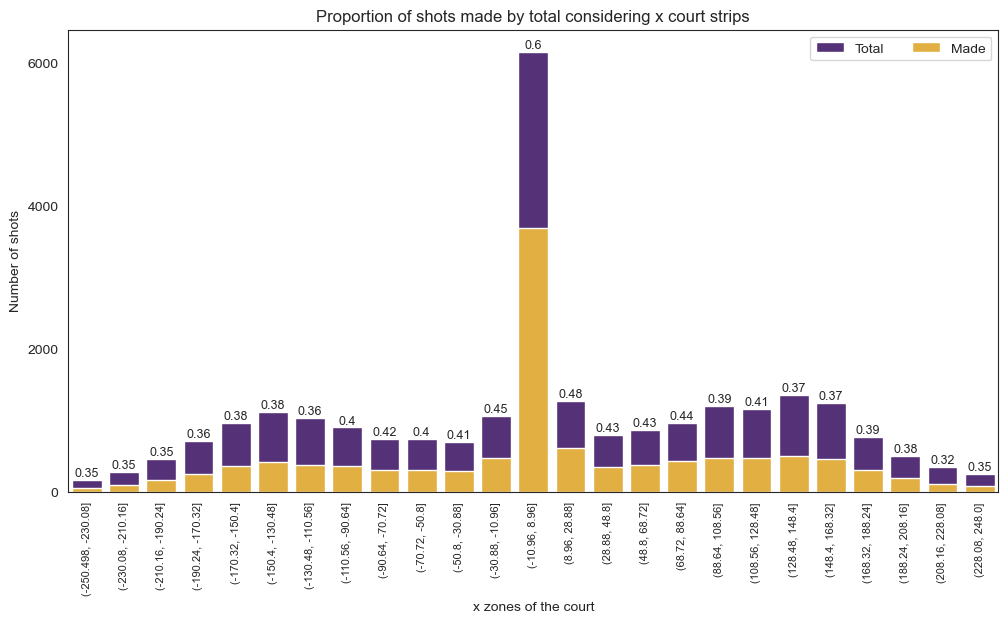

In [27]:
# make a copy of the orginal dataframoe to avoid changing it 
subset = df.copy()
subset["x_zones"] = pd.cut(df["loc_x"], bins=25)

# count the total shot in each x_zone (df_grouped1)
df_grouped1 = subset.groupby("x_zones").agg({"shot_made_flag": "count"}).reset_index()

# filter only the shot that were made 
df_shots_made = subset[subset["shot_made_flag"]==1]

# count the total shot in each x_zone(df_grouped2)
df_grouped2 = df_shots_made.groupby("x_zones").agg({"shot_made_flag": "count"}).reset_index()

# calculate the proprotion = made / total in each zone 
proportions = round(df_grouped2["shot_made_flag"] / df_grouped1["shot_made_flag"], 2)


# Visualization part 
f, ax = plt.subplots(figsize=(12, 6))
g1 = sns.barplot(x="x_zones", y="shot_made_flag", data=df_grouped1,
                 label="Total", color="#552583")
g2 = sns.barplot(x="x_zones", y="shot_made_flag", data=df_grouped2,
                 label="Made", color="#FDB927")

idx = 0
for p in g1.patches:
    g1.annotate(proportions[idx],
               (p.get_x() + p.get_width() / 2., p.get_height()-80), 
                ha="center", va="center", 
                xytext=(0, 9), fontsize=9,
                textcoords="offset points")
    if idx < 24: idx += 1
    else: break
    
plt.yticks(ticks=[0, 2000, 4000, 6000])
plt.xticks(fontsize=8, rotation=90)
ax.set_title("Proportion of shots made by total considering x court strips")
ax.set_xlabel("x zones of the court")
ax.set_ylabel("Number of shots")
ax.legend(ncol=2, loc="upper right", frameon=True);

It is now clear that taken central shots have more accuracy than lateral ones. Specifically, 60% of the shots made in the central strip were 
successful. shots in the corner are the ones that kobe had lower precision, which is a normal phenomenon among the great majority of the players.

what is interesting is that there is a better performance in some lateral zones than in others closer to the center. it also seems that the right-count shots had better resulets by a narrow margin.

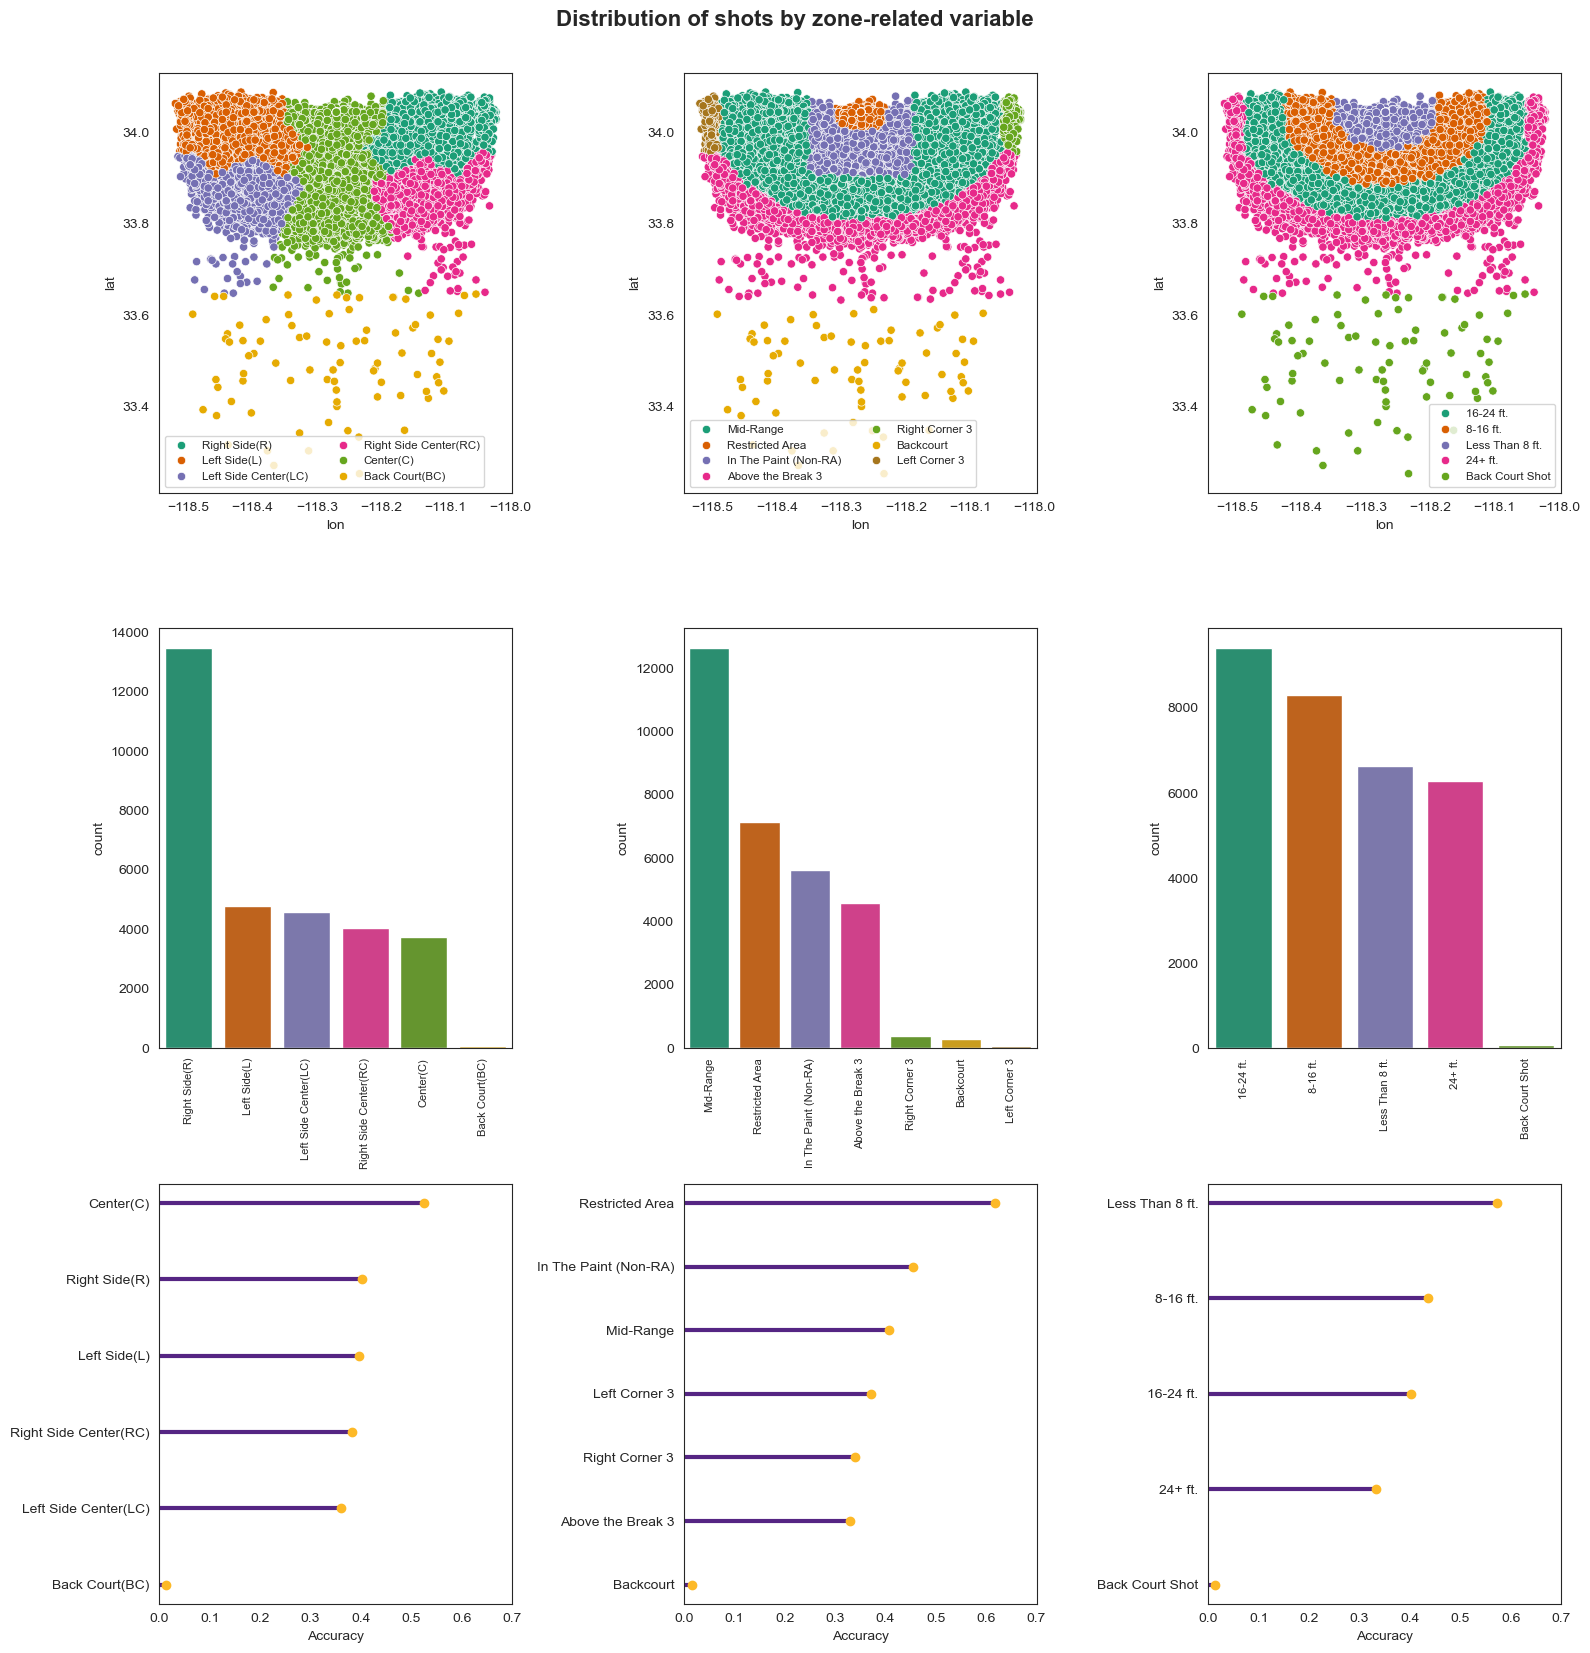

In [29]:
def make_zone_scatter(var, ax):
    sns.scatterplot(x=df['lon'], y=df['lat'], hue=df[var], ax=ax, palette='Dark2')
    ax.legend(ncol=len(df[var].unique())//3, fontsize= 'small', fancybox= True)

def make_zone_countplot(var, ax):
    sns.countplot(x=var, data=df, order=df[var].value_counts().index, ax=ax, palette='Dark2')
    ax.set_xlabel('')
    ax.set_xticklabels(df[var].unique(), fontsize=8, rotation=90)

def make_acc_lollipop(var, ax):
    subset = df[[var, 'shot_made_flag']].dropna()
    subset['shot_made_flag'] = pd.to_numeric(subset['shot_made_flag'])
    df_grouped = subset .groupby(var).agg({'shot_made_flag':'mean'}).reset_index()
    df_grouped = df_grouped.sort_values(by = 'shot_made_flag')
    ax.hlines(y=df_grouped[var], xmin=0,
               xmax=df_grouped["shot_made_flag"], color="#552583", linewidth=3)
    ax.plot(df_grouped["shot_made_flag"], range(0,len(df_grouped.index)), "o", color="#FDB927")
    ax.set_xlim([0, .7])
    ax.set_xlabel("Accuracy")

f, ((ax0, ax1, ax2), (ax3, ax4, ax5), (ax6, ax7, ax8)) = plt.subplots(3, 3, figsize = (16, 16))

make_zone_scatter('shot_zone_area', ax0)
make_zone_scatter('shot_zone_basic', ax1)
make_zone_scatter('shot_zone_range', ax2)

make_zone_countplot('shot_zone_area', ax3)
make_zone_countplot('shot_zone_basic', ax4)
make_zone_countplot('shot_zone_range', ax5)

make_acc_lollipop('shot_zone_area', ax6)
make_acc_lollipop('shot_zone_basic', ax7)
make_acc_lollipop('shot_zone_range', ax8)

f.tight_layout()

f.suptitle('Distribution of shots by zone-related variable', fontsize=16, y=1.03, fontweight = 'bold');

With this combined figure we can understand how the zone-related variables are situated among the basketball court, how are their distributions (i.e. how many shots took place in each area), and how these areas affect our dependent binary variable `shot_made_flag`.

Besides that, different types of shots have been categorized in the variables `combined_shot_type` and `action_type`. Here we examine these features, providing their impact on the accuracy of the shot metric.

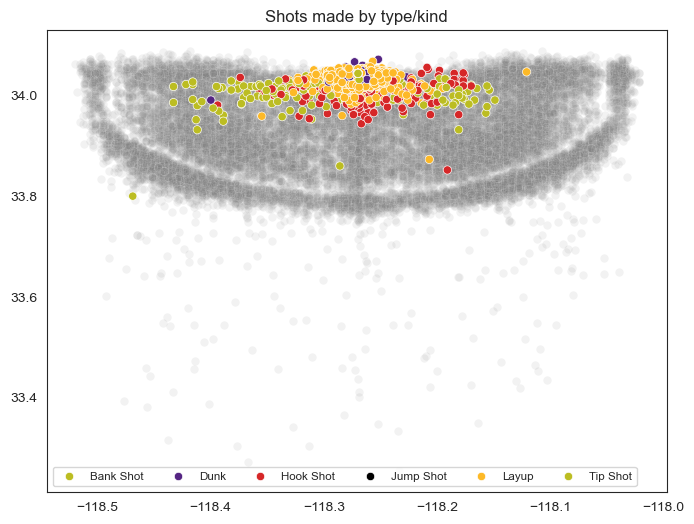

In [31]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
jump_shot_df = df[df['combined_shot_type'] == 'Jump Shot']

scatter_jumpshots = sns.scatterplot(x=jump_shot_df['lon'], y=jump_shot_df['lat'], alpha=0.1, ax=ax, color='grey')

not_jump_shot_df = df[df['combined_shot_type'] != 'Jump Shot']

scatter = sns.scatterplot(x=not_jump_shot_df['lon'], y=not_jump_shot_df['lat'], hue=not_jump_shot_df['combined_shot_type'], palette=["C8", "#552583", "C3", "#000000", "#FDB927"], ax=ax)

ax.set_title("Shots made by type/kind")

ax.set_xlabel("")
ax.set_ylabel("")

plt.legend(ncol=len(df["combined_shot_type"].unique())+1, fontsize='small', fancybox=True);

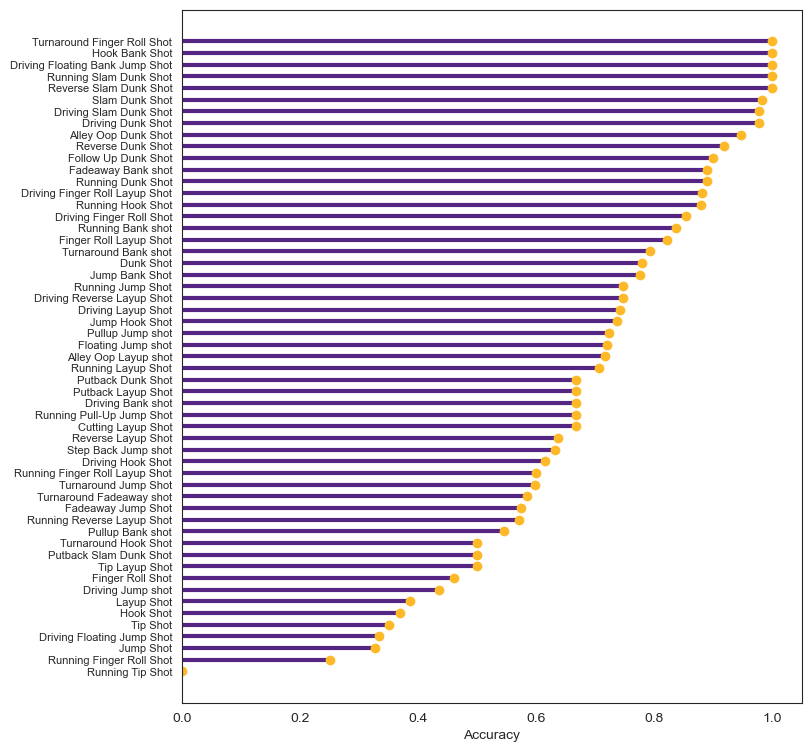

In [32]:
f, ax = plt.subplots(figsize=(8,9))

make_acc_lollipop('action_type', ax)
ax.set_xlim([0,1.05])
ax.tick_params(axis='y', labelsize=8)

We continue with the accuracy exploration, now considering the seconds remaining for the last fourth quarter or the extra ones. They should be shots with a lot of pressure, which could lead to worse performance, but Kobe has overall good stats. Despite there is a decrease in accuracy after the 5 seconds remaining.

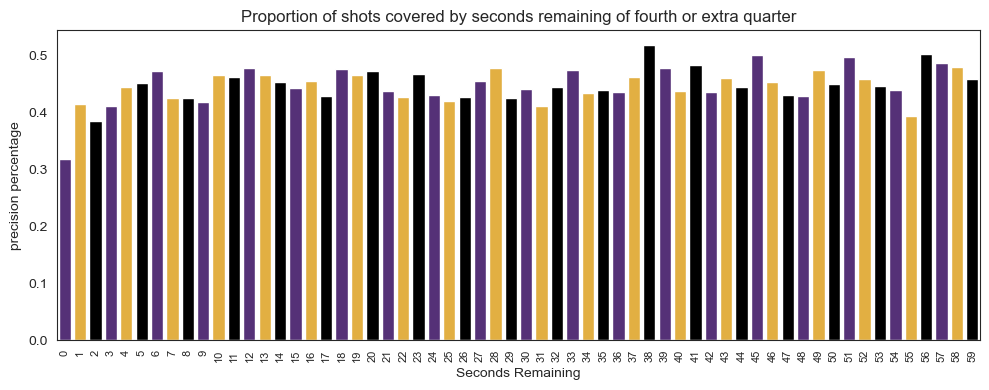

In [34]:
# Filter data into new dataframe 
subset = df[df['period']<=4][['seconds_remaining', 'shot_made_flag']].dropna()
subset = pd.DataFrame(subset, dtype=int)

# Group data and caluculate mean 
df_grouped3 = subset.groupby('seconds_remaining').agg({'shot_made_flag': 'mean'}).reset_index()

# Ploting 
fig, ax = plt.subplots(1, 1, figsize=(10,4))
sns.barplot(x = 'seconds_remaining', y = 'shot_made_flag', data=df_grouped3,
            palette=("#552583", "#FDB927", "#000000"))

# Setting the title
ax.set_title('Proportion of shots covered by seconds remaining of fourth or extra quarter')

ax.set_xlabel('Seconds Remaining')
ax.set_ylabel('precision percentage')

plt.xticks(fontsize = 8, rotation = 90);
plt.tight_layout()
plt.show()


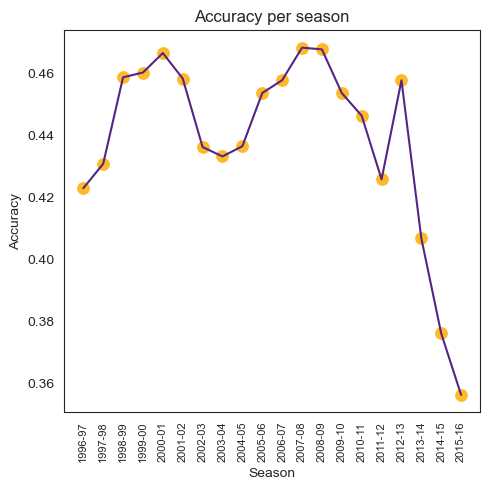

In [35]:
subset4 = df[['season', 'shot_made_flag']].dropna()

subset4['shot_made_flag'] = pd.to_numeric(subset4['shot_made_flag'])
df_grouped4 = subset4.groupby('season').agg({'shot_made_flag':'mean'}).reset_index()
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

sns.lineplot(x = 'season', y = 'shot_made_flag', data = df_grouped4, color = '#552583', ax=ax)

sns.scatterplot(x = 'season', y = 'shot_made_flag', data = df_grouped4, s = 100, color = '#FDB927', ax = ax)

ax.set_title('Accuracy per season')

ax.set_xlabel('Season')
ax.set_ylabel('Accuracy')

plt.xticks(fontsize = 8, rotation = 90 );
plt.tight_layout()
plt.show()

Finally, we will visualize three extra features: period, playoffs, shot_type. We can extract some surprising and valuable insights from them: Kobe had incredible accuracy stats in playoffs and in the extra times, big moment player.

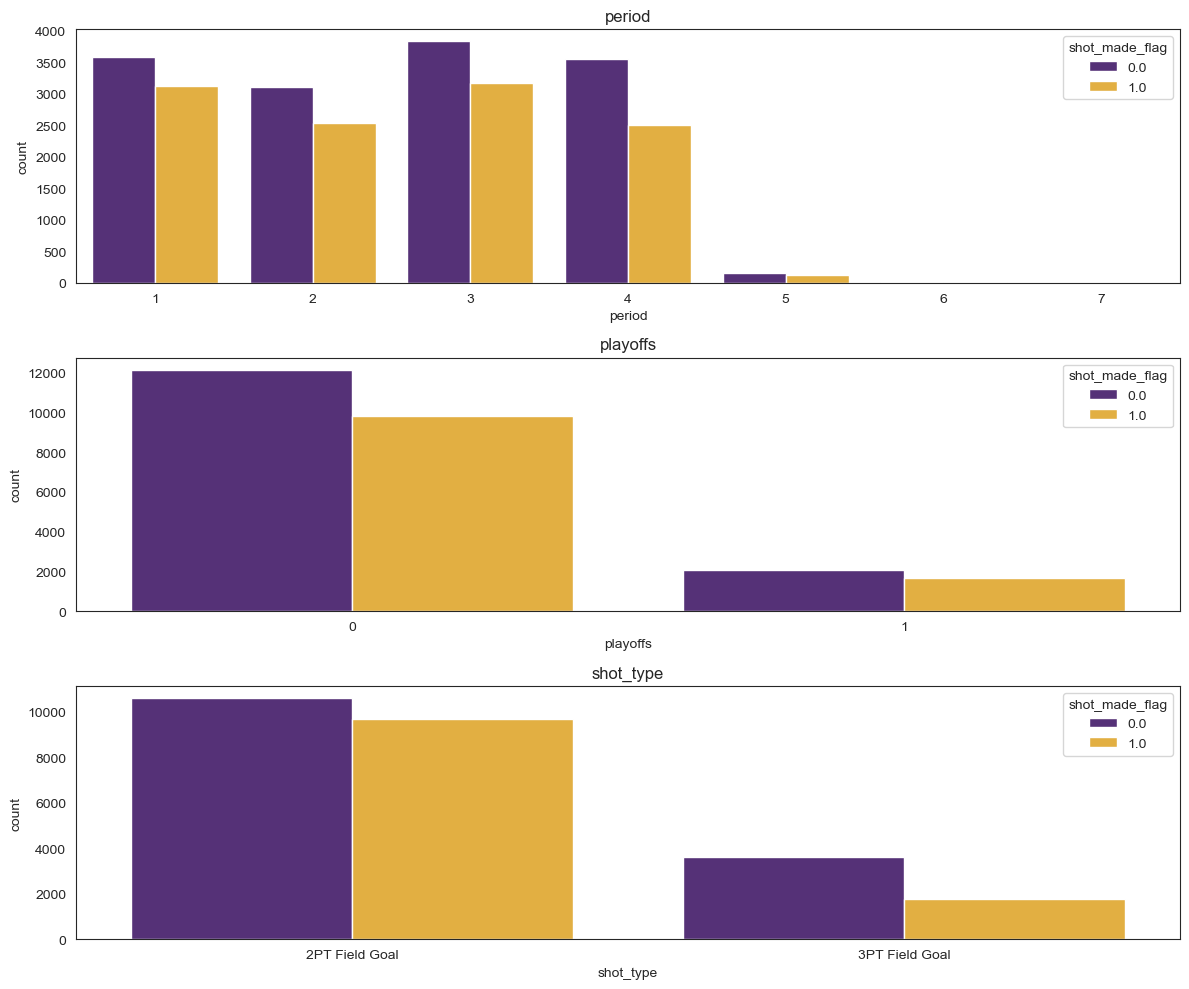

In [37]:
# Creating the subplot
f, ax = plt.subplots(3,  figsize = (12, 10))

# Looping through variables 
for var,i in zip(['period', 'playoffs', 'shot_type'], range(0,3)):
    sns.countplot(x = var, hue = 'shot_made_flag', data=df, ax=ax[i], palette=('#552583', '#FDB927'))
    ax[i].set_title(var)

plt.tight_layout()
plt.show()

### Preprocess of data

We will now make some modifications of data. To keep the orginal DataFrame integrity, we will copy it into a new one called 'copy_df'. 
This is considered a good practice and can be helpfull to prevent undesired problems. 

In [39]:
copy_df = df.copy()

target = copy_df['shot_made_flag'].copy()


#### Remove useless columns

Let us start removing some columns that do not provide any informative benefit. 

- `team_id` and `team_name` are quite useless features considering Kobe only played in one team L.A. Lakers: Their values have just one unique value.


- For `game_id` and `game_event_id`, they are independent variables that have null relation with whether a shot is made or missed. They would add noise to our model.


- `lat` and `lon` are highly correlated with `loc_x` and `loc_y`, we could be adding multicollinearity problems to our set.


- Ultimately, `shot_made_flag` is our dependent variable, and we have already stored it in the `target` series.

In [41]:
var_to_remove = ['team_id', 'team_name', 'game_id', 'game_event_id', 
                 'lat', 'lon', 'shot_made_flag']

for var in var_to_remove:
    copy_df = copy_df.drop(var, axis=1)

#### Variable's transformation

##### Action types

There are way too many action types. We need to encode those values with fewer occurrences as a new category: "Other" or "Rare actions". Otherwise, when we one-hot-encode, we will experience a great increase in the columns' dimension.

In [44]:
pd.DataFrame({'counts': copy_df['action_type'].value_counts().sort_values()[:25]})

,counts
action_type,
Cutting Finger Roll Layup Shot,1
Running Slam Dunk Shot,1
Turnaround Fadeaway Bank Jump Shot,1
Driving Floating Bank Jump Shot,1
Tip Layup Shot,2
Turnaround Finger Roll Shot,2
Putback Slam Dunk Shot,2
Running Tip Shot,2
Running Pull-Up Jump Shot,4


In [45]:
rare_action_type = copy_df['action_type'].value_counts().sort_values().index.values[:20]
copy_df.loc[copy_df['action_type'].isin(rare_action_type),'acion_type'] = 'other'


##### Game date
We will separate the month and year from the date. As we will see later on, this will contribute to the explainability of the target.

In [47]:
copy_df['game_date'] = pd.to_datetime(copy_df['game_date'])
copy_df['Game_year'] = copy_df['game_date'].dt.year
copy_df['Game_month'] = copy_df['game_date'].dt.month
copy_df = copy_df.drop('game_date', axis = 1)

##### Last seconds
As we observed in the exploratory analysis section, there was a significant decrease in the shots taken with less than 5 seconds remaining. And similarly, the accuracy with more seconds was quite uniform. We will perform a transformation to include this phenomenon and reduce the number of future columns.

In [49]:
copy_df['seconds_from_period_end'] = 60 * copy_df['minutes_remaining'] + copy_df['seconds_remaining']
copy_df['last_5_sec_in_period'] = copy_df['seconds_from_period_end'] < 5

# We can drop the rest of the things
copy_df = copy_df.drop('seconds_from_period_end', axis=1)
copy_df = copy_df.drop('minutes_remaining', axis=1)
copy_df = copy_df.drop('seconds_remaining', axis=1)

In [50]:
copy_df.tail()

,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,season,shot_distance,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,matchup,opponent,shot_id,acion_type,Game_year,Game_month,last_5_sec_in_period
30692,Jump Shot,Jump Shot,1,48,4,1,1999-00,4,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,LAL vs. IND,IND,30693,NaN,2000,6,False
30693,Tip Shot,Tip Shot,0,0,4,1,1999-00,0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,LAL vs. IND,IND,30694,NaN,2000,6,False
30694,Running Jump Shot,Jump Shot,-134,166,4,1,1999-00,21,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,LAL vs. IND,IND,30695,NaN,2000,6,False
30695,Jump Shot,Jump Shot,31,267,4,1,1999-00,26,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,LAL vs. IND,IND,30696,NaN,2000,6,False
30696,Jump Shot,Jump Shot,1,72,4,1,1999-00,7,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,LAL vs. IND,IND,30697,NaN,2000,6,False


##### x and y zones

We already did something similar in the data visualization section. Now we will include these strips in our training set for the x-axis and y-axis. But we won't drop `loc_x` and `loc_y`.

In [52]:
copy_df['x_zones'] = pd.cut(copy_df['loc_x'], bins=25)
copy_df['y_zones'] = pd.cut(copy_df['loc_y'], bins=25)

##### Home games
It will be clearer if we set a binary variable that will determine if a game was played at home or away with the classic 1 or 0 values.

In [54]:
copy_df['Home_play'] = copy_df['matchup'].str.contains('vs').astype('int')
copy_df = copy_df.drop('matchup', axis = 1)

In [55]:
copy_df

,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,season,shot_distance,shot_type,shot_zone_area,...,shot_zone_range,opponent,shot_id,acion_type,Game_year,Game_month,last_5_sec_in_period,x_zones,y_zones,Home_play
0,Jump Shot,Jump Shot,167,72,1,0,2000-01,18,2PT Field Goal,Right Side(R),...,16-24 ft.,POR,1,NaN,2000,10,False,"(148.4, 168.32]","(56.2, 89.6]",0
1,Jump Shot,Jump Shot,-157,0,1,0,2000-01,15,2PT Field Goal,Left Side(L),...,8-16 ft.,POR,2,NaN,2000,10,False,"(-170.32, -150.4]","(-10.6, 22.8]",0
2,Jump Shot,Jump Shot,-101,135,1,0,2000-01,16,2PT Field Goal,Left Side Center(LC),...,16-24 ft.,POR,3,NaN,2000,10,False,"(-110.56, -90.64]","(123.0, 156.4]",0
3,Jump Shot,Jump Shot,138,175,1,0,2000-01,22,2PT Field Goal,Right Side Center(RC),...,16-24 ft.,POR,4,NaN,2000,10,False,"(128.48, 148.4]","(156.4, 189.8]",0
4,Driving Dunk Shot,Dunk,0,0,2,0,2000-01,0,2PT Field Goal,Center(C),...,Less Than 8 ft.,POR,5,NaN,2000,10,False,"(-10.96, 8.96]","(-10.6, 22.8]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30692,Jump Shot,Jump Shot,1,48,4,1,1999-00,4,2PT Field Goal,Center(C),...,Less Than 8 ft.,IND,30693,NaN,2000,6,False,"(-10.96, 8.96]","(22.8, 56.2]",1
30693,Tip Shot,Tip Shot,0,0,4,1,1999-00,0,2PT Field Goal,Center(C),...,Less Than 8 ft.,IND,30694,NaN,2000,6,False,"(-10.96, 8.96]","(-10.6, 22.8]",1
30694,Running Jump Shot,Jump Shot,-134,166,4,1,1999-00,21,2PT Field Goal,Left Side Center(LC),...,16-24 ft.,IND,30695,NaN,2000,6,False,"(-150.4, -130.48]","(156.4, 189.8]",1
30695,Jump Shot,Jump Shot,31,267,4,1,1999-00,26,3PT Field Goal,Center(C),...,24+ ft.,IND,30696,NaN,2000,6,False,"(28.88, 48.8]","(256.6, 290.0]",1


#### Encode the categorical variables

We are finally in a position to one-hot-encode our categorical variables.

In [57]:
pd.get_dummies(copy_df['action_type']).add_prefix('{}#'.format('action_type'))

categorial_vars = ['action_type', 'combined_shot_type', 'period', 'season', 'shot_type', 
                   'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'Game_year', 
                   'Game_month', 'opponent', 'loc_x', 'loc_y', 'x_zones', 'y_zones']

for var in categorial_vars:
    dummies = pd.get_dummies(copy_df[var])
    dummies = dummies.add_prefix('{}#'.format(var))
    copy_df.drop(var, axis = 1, inplace = True)
    copy_df = copy_df.join(dummies)

In [58]:
copy_df.head()

,playoffs,shot_distance,shot_id,acion_type,last_5_sec_in_period,Home_play,action_type#Alley Oop Dunk Shot,action_type#Alley Oop Layup shot,action_type#Cutting Finger Roll Layup Shot,action_type#Cutting Layup Shot,...,"y_zones#(457.0, 490.4]","y_zones#(490.4, 523.8]","y_zones#(523.8, 557.2]","y_zones#(557.2, 590.6]","y_zones#(590.6, 624.0]","y_zones#(624.0, 657.4]","y_zones#(657.4, 690.8]","y_zones#(690.8, 724.2]","y_zones#(724.2, 757.6]","y_zones#(757.6, 791.0]"
0,0,18,1,NaN,False,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,15,2,NaN,False,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,16,3,NaN,False,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,22,4,NaN,False,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,0,5,NaN,False,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
# List of columns to exclude
cols_to_drop = [
    'action_type',   # unique identifier
    'game_id',       # just a game reference
    'team_id',       # always the same
    'team_name',     # always "Los Angeles Lakers"
    'game_date',     # can be converted, but raw not useful
    'matchup',
    'opponent',# redundant with 'opponent' and 'playoffs'
    'game_event_id',
    'playoffs'
]

# Drop the columns from the dataset
df_cleaned = df.drop(columns=cols_to_drop)

# Show the new shape and columns
print("Remaining columns:", df_cleaned.columns.tolist())


Remaining columns: ['combined_shot_type', 'lat', 'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag', 'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'shot_id']


In [60]:
df_cleaned['shot_made_flag'].value_counts

<bound method IndexOpsMixin.value_counts of 0        NaN
1        0.0
2        1.0
3        0.0
4        1.0
        ... 
30692    0.0
30693    NaN
30694    1.0
30695    0.0
30696    0.0
Name: shot_made_flag, Length: 30697, dtype: category
Categories (2, float64): [0.0, 1.0]>

In [61]:
df_cleaned = df_cleaned.drop_duplicates()

In [62]:
df_cleaned['shot_made_flag'].isnull().count()

30697

In [63]:

df_cleaned = df_cleaned.dropna(subset = ['shot_made_flag'])

In [64]:
df_cleaned['shot_made_flag'].unique

<bound method Series.unique of 1        0.0
2        1.0
3        0.0
4        1.0
5        0.0
        ... 
30691    0.0
30692    0.0
30694    1.0
30695    0.0
30696    0.0
Name: shot_made_flag, Length: 25697, dtype: category
Categories (2, float64): [0.0, 1.0]>

In [65]:
df_cleaned['shot_made_flag'] = df_cleaned['shot_made_flag'].astype(int)

In [66]:
df_cleaned

,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,shot_id
1,Jump Shot,34.0443,-157,0,-118.4268,10,1,2000-01,22,15,0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2
2,Jump Shot,33.9093,-101,135,-118.3708,7,1,2000-01,45,16,1,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,3
3,Jump Shot,33.8693,138,175,-118.1318,6,1,2000-01,52,22,0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,4
4,Dunk,34.0443,0,0,-118.2698,6,2,2000-01,19,0,1,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,5
5,Jump Shot,34.0553,-145,-11,-118.4148,9,3,2000-01,32,14,0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30691,Layup,34.0443,0,0,-118.2698,7,4,1999-00,4,0,0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,30692
30692,Jump Shot,33.9963,1,48,-118.2688,6,4,1999-00,5,4,0,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,30693
30694,Jump Shot,33.8783,-134,166,-118.4038,3,4,1999-00,28,21,1,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,30695
30695,Jump Shot,33.7773,31,267,-118.2388,2,4,1999-00,10,26,0,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,30696


In [67]:
df_cleaned['shot_made_flag'].duplicated()

1        False
2        False
3         True
4         True
5         True
         ...  
30691     True
30692     True
30694     True
30695     True
30696     True
Name: shot_made_flag, Length: 25697, dtype: bool

In [68]:
df_cleaned['shot_made_flag1'] = df_cleaned['shot_made_flag']

In [69]:
df_cleaned = df_cleaned.drop('shot_made_flag', axis = 1)

In [70]:
# Renameing the target features
df_cleaned= df_cleaned.rename(columns = {'shot_made_flag1' : 'shot_made_flag'})
df_cleaned.head(5)

,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,season,seconds_remaining,shot_distance,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,shot_id,shot_made_flag
1,Jump Shot,34.0443,-157,0,-118.4268,10,1,2000-01,22,15,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2,0
2,Jump Shot,33.9093,-101,135,-118.3708,7,1,2000-01,45,16,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,3,1
3,Jump Shot,33.8693,138,175,-118.1318,6,1,2000-01,52,22,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,4,0
4,Dunk,34.0443,0,0,-118.2698,6,2,2000-01,19,0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,5,1
5,Jump Shot,34.0553,-145,-11,-118.4148,9,3,2000-01,32,14,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,6,0


In [71]:
# LabelEncoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_cleaned['combined_shot_type'] = le.fit_transform(df_cleaned['combined_shot_type'])
df_cleaned['shot_zone_area'] = le.fit_transform(df_cleaned['shot_zone_area'])
df_cleaned['shot_zone_basic'] = le.fit_transform(df_cleaned['shot_zone_basic'])
df_cleaned['shot_type'] = le.fit_transform(df_cleaned['shot_type'])
df_cleaned['shot_zone_range'] = le.fit_transform(df_cleaned['shot_zone_range'])

In [72]:
# Extract the starting year and convert to int
df_cleaned['season'] = df_cleaned['season'].str[:4].astype(int)


In [73]:
df_cleaned

,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,season,seconds_remaining,shot_distance,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,shot_id,shot_made_flag
1,3,34.0443,-157,0,-118.4268,10,1,2000,22,15,0,3,4,2,2,0
2,3,33.9093,-101,135,-118.3708,7,1,2000,45,16,0,2,4,0,3,1
3,3,33.8693,138,175,-118.1318,6,1,2000,52,22,0,4,4,0,4,0
4,1,34.0443,0,0,-118.2698,6,2,2000,19,0,0,1,5,4,5,1
5,3,34.0553,-145,-11,-118.4148,9,3,2000,32,14,0,3,4,2,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30691,4,34.0443,0,0,-118.2698,7,4,1999,4,0,0,1,5,4,30692,0
30692,3,33.9963,1,48,-118.2688,6,4,1999,5,4,0,1,2,4,30693,0
30694,3,33.8783,-134,166,-118.4038,3,4,1999,28,21,0,2,4,0,30695,1
30695,3,33.7773,31,267,-118.2388,2,4,1999,10,26,1,1,0,1,30696,0


<Axes: ylabel='combined_shot_type'>

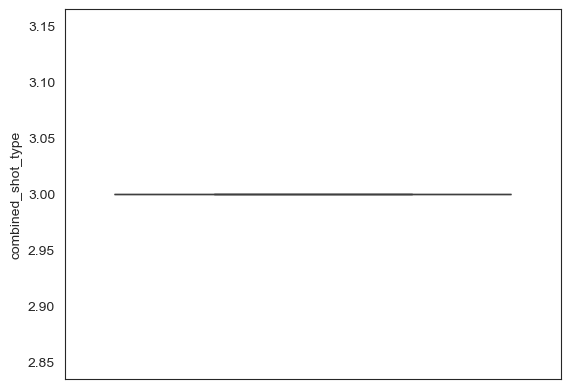

In [74]:
import pandas as pd

# Example: find outliers for a column
Q1 = df_cleaned['combined_shot_type'].quantile(0.25)
Q3 = df_cleaned['combined_shot_type'].quantile(0.75)
IQR = Q3 - Q1

min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

# Since the dataset is not normal, we replace the outliers with median 
df_cleaned.loc[df_cleaned['combined_shot_type'] < min_limit, 'combined_shot_type'] = np.median(df_cleaned.combined_shot_type)
df_cleaned.loc[df_cleaned['combined_shot_type'] > max_limit, 'combined_shot_type'] = np.median(df_cleaned.combined_shot_type)

sns.boxplot(df_cleaned.combined_shot_type)

<Axes: ylabel='lat'>

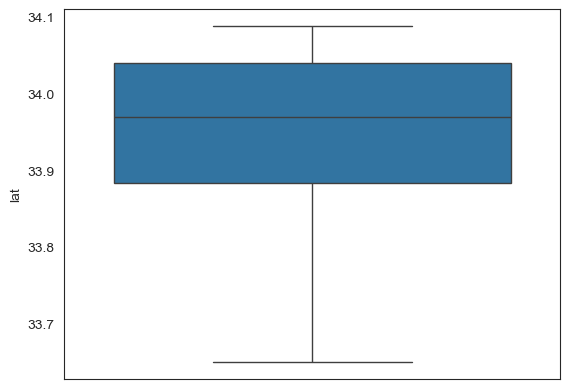

In [75]:
import pandas as pd

# Example: find outliers for a column
Q1 = df_cleaned['lat'].quantile(0.25)
Q3 = df_cleaned['lat'].quantile(0.75)
IQR = Q3 - Q1

min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

# Since the dataset is not normal, we replace the outliers with median 
df_cleaned.loc[df_cleaned['lat'] < min_limit, 'lat'] = np.median(df_cleaned.lat)
df_cleaned.loc[df_cleaned['lat'] > max_limit, 'lat'] = np.median(df_cleaned.lat)

sns.boxplot(df_cleaned.lat)

<Axes: ylabel='loc_x'>

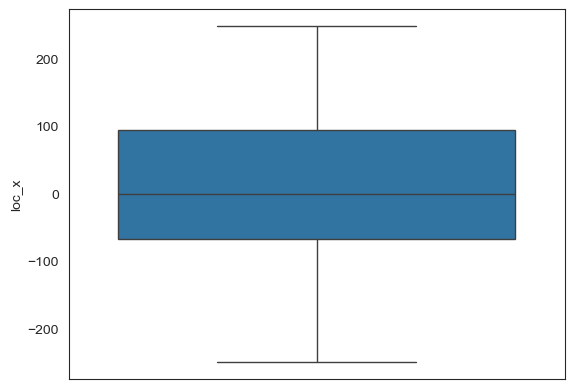

In [76]:
import pandas as pd

# Example: find outliers for a column
Q1 = df_cleaned['loc_x'].quantile(0.25)
Q3 = df_cleaned['loc_x'].quantile(0.75)
IQR = Q3 - Q1

min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

# Since the dataset is not normal, we replace the outliers with median 
df_cleaned.loc[df_cleaned['loc_x'] < min_limit, 'loc_x'] = np.median(df_cleaned.loc_x)
df_cleaned.loc[df_cleaned['loc_x'] > max_limit, 'loc_x'] = np.median(df_cleaned.loc_x)

sns.boxplot(df_cleaned.loc_x)

<Axes: ylabel='loc_y'>

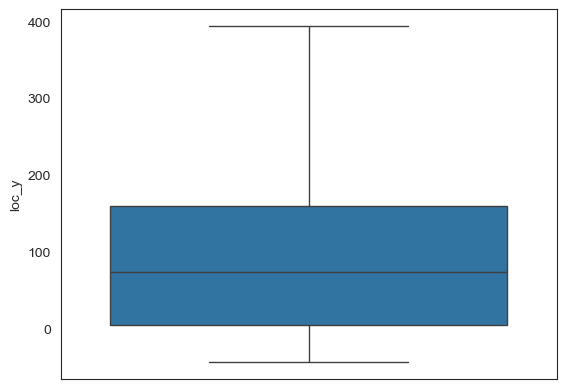

In [77]:
import pandas as pd

# Example: find outliers for a column
Q1 = df_cleaned['loc_y'].quantile(0.25)
Q3 = df_cleaned['loc_y'].quantile(0.75)
IQR = Q3 - Q1

min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

# Since the dataset is not normal, we replace the outliers with median 
df_cleaned.loc[df_cleaned['loc_y'] < min_limit, 'loc_y'] = np.median(df_cleaned.loc_y)
df_cleaned.loc[df_cleaned['loc_y'] > max_limit, 'loc_y'] = np.median(df_cleaned.loc_y)

sns.boxplot(df_cleaned.loc_y)

<Axes: ylabel='lon'>

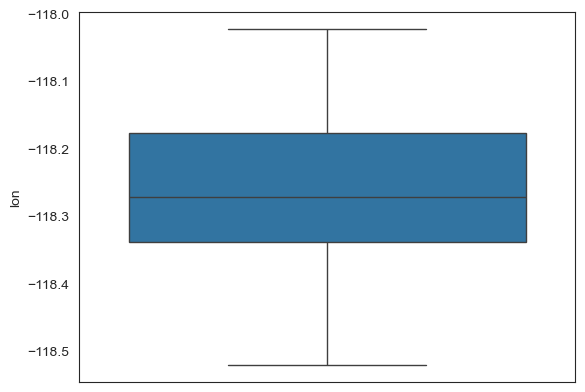

In [78]:
import pandas as pd

# Example: find outliers for a column
Q1 = df_cleaned['lon'].quantile(0.25)
Q3 = df_cleaned['lon'].quantile(0.75)
IQR = Q3 - Q1

min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

# Since the dataset is not normal, we replace the outliers with median 
df_cleaned.loc[df_cleaned['lon'] < min_limit, 'lon'] = np.median(df_cleaned.lon)
df_cleaned.loc[df_cleaned['lon'] > max_limit, 'lon'] = np.median(df_cleaned.lon)

sns.boxplot(df_cleaned.lon)

<Axes: ylabel='minutes_remaining'>

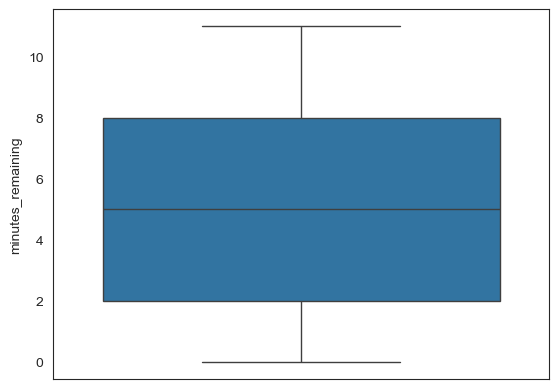

In [79]:
import pandas as pd

# Example: find outliers for a column
Q1 = df_cleaned['minutes_remaining'].quantile(0.25)
Q3 = df_cleaned['minutes_remaining'].quantile(0.75)
IQR = Q3 - Q1

min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

# Since the dataset is not normal, we replace the outliers with median 
df_cleaned.loc[df_cleaned['minutes_remaining'] < min_limit, 'minutes_remaining'] = np.median(df_cleaned.minutes_remaining)
df_cleaned.loc[df_cleaned['minutes_remaining'] > max_limit, 'minutes_remaining'] = np.median(df_cleaned.minutes_remaining)

sns.boxplot(df_cleaned.minutes_remaining)

<Axes: ylabel='period'>

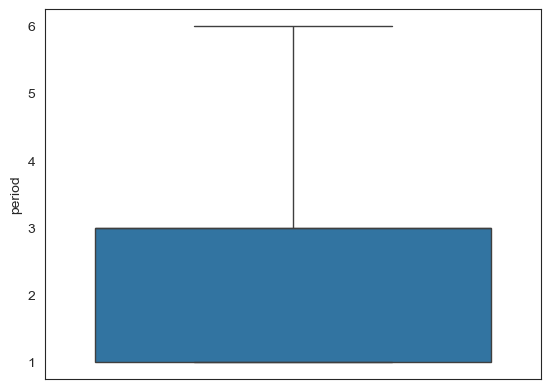

In [80]:
import pandas as pd

# Example: find outliers for a column
Q1 = df_cleaned['period'].quantile(0.25)
Q3 = df_cleaned['period'].quantile(0.75)
IQR = Q3 - Q1

min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

# Since the dataset is not normal, we replace the outliers with median 
df_cleaned.loc[df_cleaned['period'] < min_limit, 'period'] = np.median(df_cleaned.period)
df_cleaned.loc[df_cleaned['period'] > max_limit, 'period'] = np.median(df_cleaned.period)

sns.boxplot(df_cleaned.period)

<Axes: ylabel='season'>

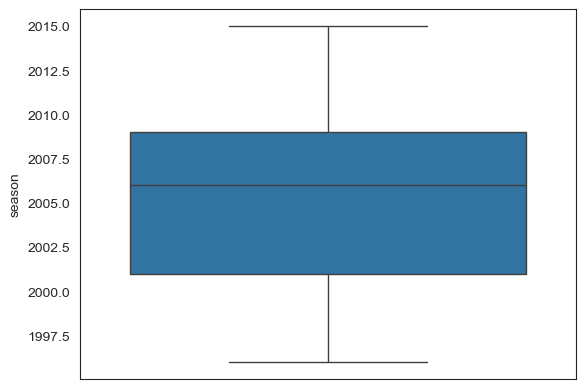

In [81]:
import pandas as pd

# Example: find outliers for a column
Q1 = df_cleaned['season'].quantile(0.25)
Q3 = df_cleaned['season'].quantile(0.75)
IQR = Q3 - Q1

min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

# Since the dataset is not normal, we replace the outliers with median 
df_cleaned.loc[df_cleaned['season'] < min_limit, 'season'] = np.median(df_cleaned.season)
df_cleaned.loc[df_cleaned['season'] > max_limit, 'season'] = np.median(df_cleaned.season)

sns.boxplot(df_cleaned.season)

<Axes: ylabel='seconds_remaining'>

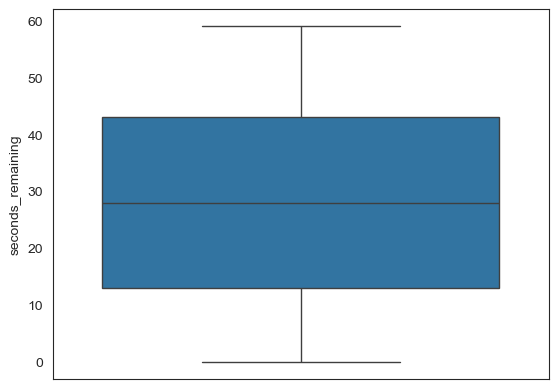

In [82]:
import pandas as pd

# Example: find outliers for a column
Q1 = df_cleaned['seconds_remaining'].quantile(0.25)
Q3 = df_cleaned['seconds_remaining'].quantile(0.75)
IQR = Q3 - Q1

min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

# Since the dataset is not normal, we replace the outliers with median 
df_cleaned.loc[df_cleaned['seconds_remaining'] < min_limit, 'seconds_remaining'] = np.median(df_cleaned.seconds_remaining)
df_cleaned.loc[df_cleaned['seconds_remaining'] > max_limit, 'seconds_remaining'] = np.median(df_cleaned.seconds_remaining)

sns.boxplot(df_cleaned.seconds_remaining)

<Axes: ylabel='shot_distance'>

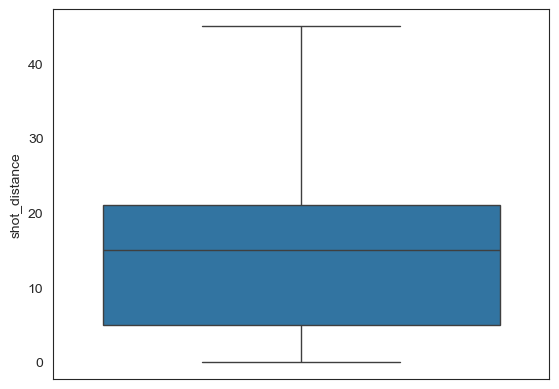

In [83]:
import pandas as pd

# Example: find outliers for a column
Q1 = df_cleaned['shot_distance'].quantile(0.25)
Q3 = df_cleaned['shot_distance'].quantile(0.75)
IQR = Q3 - Q1

min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

# Since the dataset is not normal, we replace the outliers with median 
df_cleaned.loc[df_cleaned['shot_distance'] < min_limit, 'shot_distance'] = np.median(df_cleaned.shot_distance)
df_cleaned.loc[df_cleaned['shot_distance'] > max_limit, 'shot_distance'] = np.median(df_cleaned.shot_distance)

sns.boxplot(df_cleaned.shot_distance)

<Axes: ylabel='shot_zone_basic'>

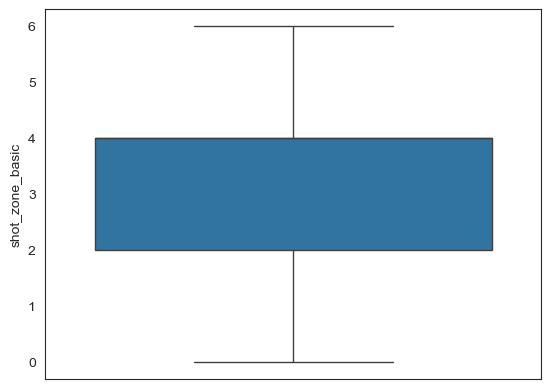

In [84]:
import pandas as pd

# Example: find outliers for a column
Q1 = df_cleaned['shot_zone_basic'].quantile(0.25)
Q3 = df_cleaned['shot_zone_basic'].quantile(0.75)
IQR = Q3 - Q1

min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

# Since the dataset is not normal, we replace the outliers with median 
df_cleaned.loc[df_cleaned['shot_zone_basic'] < min_limit, 'shot_zone_basic'] = np.median(df_cleaned.shot_zone_basic)
df_cleaned.loc[df_cleaned['shot_zone_basic'] > max_limit, 'shot_zone_basic'] = np.median(df_cleaned.shot_zone_basic)

sns.boxplot(df_cleaned.shot_zone_basic)

<Axes: ylabel='shot_zone_range'>

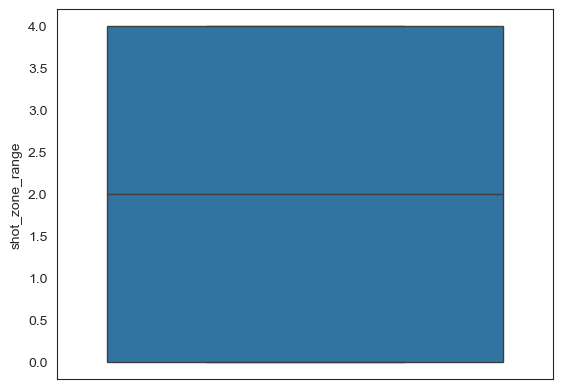

In [85]:
import pandas as pd

# Example: find outliers for a column
Q1 = df_cleaned['shot_zone_range'].quantile(0.25)
Q3 = df_cleaned['shot_zone_range'].quantile(0.75)
IQR = Q3 - Q1

min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

# Since the dataset is not normal, we replace the outliers with median 
df_cleaned.loc[df_cleaned['shot_zone_range'] < min_limit, 'shot_zone_range'] = np.median(df_cleaned.shot_zone_range)
df_cleaned.loc[df_cleaned['shot_zone_range'] > max_limit, 'shot_zone_range'] = np.median(df_cleaned.shot_zone_range)

sns.boxplot(df_cleaned.shot_zone_range)

In [86]:
import pandas as pd
import numpy as np

# Assuming your dataframe is 'df' and target column is 'target'
proportions = df_cleaned['shot_made_flag'].value_counts(normalize=True)

print(proportions)


shot_made_flag
0    0.553839
1    0.446161
Name: proportion, dtype: float64


In [87]:
# Entropy formula
entropy = -np.sum(proportions * np.log2(proportions))

print("Entropy of the target variable:", entropy)


Entropy of the target variable: 0.9916200707419425


In [88]:
import numpy as np

# Example proportions
proportions = [0.5, 0.3, 0.2]

# Calculate entropy
entropy = -np.sum(proportions * np.log2(proportions))
print("Entropy:", entropy)


Entropy: 1.4854752972273344


In [89]:
df_cleaned.keys()

Index(['combined_shot_type', 'lat', 'loc_x', 'loc_y', 'lon',
       'minutes_remaining', 'period', 'season', 'seconds_remaining',
       'shot_distance', 'shot_type', 'shot_zone_area', 'shot_zone_basic',
       'shot_zone_range', 'shot_id', 'shot_made_flag'],
      dtype='object')

In [90]:
scaler = MinMaxScaler()
df_cleaned[['combined_shot_type', 'lat', 'loc_x', 'loc_y', 'lon',
       'minutes_remaining', 'period', 'season', 'seconds_remaining',
       'shot_distance', 'shot_type', 'shot_zone_area', 'shot_zone_basic',
       'shot_zone_range', 'shot_id', 'shot_made_flag']] = scaler.fit_transform(df_cleaned[['combined_shot_type', 'lat', 'loc_x', 'loc_y', 'lon',
       'minutes_remaining', 'period', 'season', 'seconds_remaining',
       'shot_distance', 'shot_type', 'shot_zone_area', 'shot_zone_basic',
       'shot_zone_range', 'shot_id', 'shot_made_flag']])

In [91]:
df_cleaned

,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,season,seconds_remaining,shot_distance,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,shot_id,shot_made_flag
1,0.0,0.899543,0.186747,0.100457,0.186747,0.909091,0.0,0.210526,0.372881,0.333333,0.0,0.6,0.666667,0.50,0.000000,0.0
2,0.0,0.591324,0.299197,0.408676,0.299197,0.636364,0.0,0.210526,0.762712,0.355556,0.0,0.4,0.666667,0.00,0.000033,1.0
3,0.0,0.500000,0.779116,0.500000,0.779116,0.545455,0.0,0.210526,0.881356,0.488889,0.0,0.8,0.666667,0.00,0.000065,0.0
4,0.0,0.899543,0.502008,0.100457,0.502008,0.545455,0.2,0.210526,0.322034,0.000000,0.0,0.2,0.833333,1.00,0.000098,1.0
5,0.0,0.924658,0.210843,0.075342,0.210843,0.818182,0.4,0.210526,0.542373,0.311111,0.0,0.6,0.666667,0.50,0.000130,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30691,0.0,0.899543,0.502008,0.100457,0.502008,0.636364,0.6,0.157895,0.067797,0.000000,0.0,0.2,0.833333,1.00,0.999837,0.0
30692,0.0,0.789954,0.504016,0.210046,0.504016,0.545455,0.6,0.157895,0.084746,0.088889,0.0,0.2,0.333333,1.00,0.999870,0.0
30694,0.0,0.520548,0.232932,0.479452,0.232932,0.272727,0.6,0.157895,0.474576,0.466667,0.0,0.4,0.666667,0.00,0.999935,1.0
30695,0.0,0.289954,0.564257,0.710046,0.564257,0.181818,0.6,0.157895,0.169492,0.577778,1.0,0.2,0.000000,0.25,0.999967,0.0


# Splitting the data into x and y

In [93]:
X = df_cleaned.iloc[:,0:-1]
Y = df_cleaned.shot_made_flag

In [94]:
X.isnull().sum()

combined_shot_type    0
lat                   0
loc_x                 0
loc_y                 0
lon                   0
minutes_remaining     0
period                0
season                0
seconds_remaining     0
shot_distance         0
shot_type             0
shot_zone_area        0
shot_zone_basic       0
shot_zone_range       0
shot_id               0
dtype: int64

In [95]:
X.head(5)

,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,season,seconds_remaining,shot_distance,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,shot_id
1,0.0,0.899543,0.186747,0.100457,0.186747,0.909091,0.0,0.210526,0.372881,0.333333,0.0,0.6,0.666667,0.5,0.000000
2,0.0,0.591324,0.299197,0.408676,0.299197,0.636364,0.0,0.210526,0.762712,0.355556,0.0,0.4,0.666667,0.0,0.000033
3,0.0,0.500000,0.779116,0.500000,0.779116,0.545455,0.0,0.210526,0.881356,0.488889,0.0,0.8,0.666667,0.0,0.000065
4,0.0,0.899543,0.502008,0.100457,0.502008,0.545455,0.2,0.210526,0.322034,0.000000,0.0,0.2,0.833333,1.0,0.000098
5,0.0,0.924658,0.210843,0.075342,0.210843,0.818182,0.4,0.210526,0.542373,0.311111,0.0,0.6,0.666667,0.5,0.000130


In [96]:
Y = Y.astype(int)
Y

1        0
2        1
3        0
4        1
5        0
        ..
30691    0
30692    0
30694    1
30695    0
30696    0
Name: shot_made_flag, Length: 25697, dtype: int32

In [97]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_res, Y_res = sm.fit_resample(X,Y)
print("Unbalanced data:", Counter(Y))
print("Balanced data:", Counter(Y_res))

Unbalanced data: Counter({0: 14232, 1: 11465})
Balanced data: Counter({0: 14232, 1: 14232})


# Train Test split 

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size = 0.25, random_state = 42)

In [100]:
# Checking the Shape of our train and test splits 
print('Shape of X_train =>',X_train.shape)
print('Shape of Y_train =>',Y_train.shape)
print('Shape of X_test =>',X_test.shape)
print('Shape of Y_test =>',Y_test.shape)

Shape of X_train => (21348, 15)
Shape of Y_train => (21348,)
Shape of X_test => (7116, 15)
Shape of Y_test => (7116,)


# Classification Algorithms 
- Logistic Regression
- decision Tree
- Random Forest
- XGBoost

# Evaluation Metrics

In [103]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 

def model_evaluation(model, X_train, Y_train, X_test, Y_test):
    #predict on the training data 
    Y_train_pred = model.predict(X_train)

    # Caculate metrics for the training set
    train_r2 = r2_score(Y_train, Y_train_pred)
    train_mae = mean_absolute_error(Y_train, Y_train_pred)
    train_mse = mean_squared_error(Y_train, Y_train_pred)
    train_rmse = np.sqrt(train_mse)

    # Print training data metrics 
    print(f'Training Data R-squared: {train_r2:.2f}')
    print(f'Training Data MAE: {train_mae:.2f}')
    print(f'Training Data MSE: {train_mse:.2f}')
    print(f'Training Data RMSE: {train_rmse:.2f}')

    # Predict on the data 
    Y_test_pred = model.predict(X_test)

    # Calculate metrucs for the set
    test_r2 = r2_score(Y_test, Y_test_pred)
    test_mae = mean_absolute_error(Y_test, Y_test_pred)
    test_mse = mean_squared_error(Y_test, Y_test_pred)
    test_rmse = np.sqrt(test_mse)

    # Print the test data metrics
    print(f'test Data R-squared: {test_r2:.2f}')
    print(f'test Data MAE: {test_mae:.2f}')
    print(f'test Data MSE: {test_mse:.2f}')
    print(f'test Data RMSE: {test_rmse:.2f}')

    metrics_df = pd.DataFrame({
        "Metric": ["R-squared", "MAE", "MSE", "RMSE"],
        "Training": [train_r2, train_mae, train_mse, train_rmse],
        "Testing": [test_r2, test_mae, test_mse, test_rmse]
    })
    metrics_df["Training"] = metrics_df["Training"].apply(lambda x: f"{x:,.2f}")
    metrics_df["Testing"] = metrics_df["Testing"].apply(lambda x: f"{x:,.2f}")

    
    
    return metrics_df

# Model 1 : Logistic Regression

In [105]:
X_train.isnull().sum()

combined_shot_type    0
lat                   0
loc_x                 0
loc_y                 0
lon                   0
minutes_remaining     0
period                0
season                0
seconds_remaining     0
shot_distance         0
shot_type             0
shot_zone_area        0
shot_zone_basic       0
shot_zone_range       0
shot_id               0
dtype: int64

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

model_lr = LogisticRegression(random_state=42)

model_lr.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [107]:
# Predicting the values
Y_pred_lr = model_lr.predict(X_test)

In [108]:
# Checking the accuracy for logistic modle `
accuracy_score(Y_test, Y_pred_lr)

0.579398538504778

In [109]:
print(classification_report(Y_test, Y_pred_lr))

              precision    recall  f1-score   support

           0       0.57      0.65      0.61      3572
           1       0.59      0.51      0.55      3544

    accuracy                           0.58      7116
   macro avg       0.58      0.58      0.58      7116
weighted avg       0.58      0.58      0.58      7116



In [110]:
# Using confusion matrix to evaluate the classification
confusion_matrix(Y_test, Y_pred_lr)

array([[2310, 1262],
       [1731, 1813]], dtype=int64)

# Model 2 : Random Forest 

In [112]:
# Importing the model
from sklearn.ensemble import RandomForestClassifier

# Object Creation
model_rf = RandomForestClassifier()

# Fitting the data 
model_rf.fit(X_train, Y_train)

RandomForestClassifier()

In [113]:
# Predicting the values
Y_pred_rf = model_rf.predict(X_test)

In [114]:
# Checcking the accuracy score for random forest 
accuracy_score(Y_test, Y_pred_rf)

0.6157953906689151

In [115]:
# Classification report
print(classification_report(Y_test, Y_pred_rf))

              precision    recall  f1-score   support

           0       0.61      0.67      0.64      3572
           1       0.63      0.56      0.59      3544

    accuracy                           0.62      7116
   macro avg       0.62      0.62      0.61      7116
weighted avg       0.62      0.62      0.61      7116



In [116]:
# Ussing confusion matrix to evaluate the classification
confusion_matrix(Y_test, Y_pred_rf)

array([[2391, 1181],
       [1553, 1991]], dtype=int64)

## Hyerparameter Turning for RandomForestclassifier

In [118]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Define the model
model_rf = RandomForestClassifier()

# Define parameter distribution
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

# Random Search
random_search = RandomizedSearchCV(estimator=model_rf, param_distributions=param_dist,
                                   n_iter=50, cv=5, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

# Fit
random_search.fit(X_train, Y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 484}
Best Score: 0.626006924272422


In [119]:
from sklearn.metrics import accuracy_score

# Get the best model after tuning
best_model = random_search.best_estimator_  # or random_search.best_estimator_

# Make predictions on test set
y_pred_rf_hy = best_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(Y_test, y_pred_rf_hy)

print("Test Set Accuracy:", accuracy_rf)

Test Set Accuracy: 0.6257729061270376


In [120]:
print(classification_report(Y_test, y_pred_rf_hy))

              precision    recall  f1-score   support

           0       0.62      0.67      0.64      3572
           1       0.64      0.58      0.61      3544

    accuracy                           0.63      7116
   macro avg       0.63      0.63      0.62      7116
weighted avg       0.63      0.63      0.62      7116



## Hyerparameter Turning for LogisticRegression

In [122]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import loguniform

model_lr = LogisticRegression(solver='liblinear')

# Parameter distribution
param_dist = {
    'penalty': ['l1', 'l2'],
    'C': loguniform(0.01, 100)
}

random_search = RandomizedSearchCV(estimator=model_lr, param_distributions=param_dist,
                                   n_iter=20, cv=5, scoring='accuracy',
                                   random_state=42, verbose=1, n_jobs=-1)

random_search.fit(X_train, Y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score (CV Accuracy):", random_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 6.79657809075816, 'penalty': 'l2'}
Best Score (CV Accuracy): 0.5801017191088963


In [123]:
from sklearn.metrics import accuracy_score

# Use best model from grid/random search
best_model = random_search.best_estimator_  # or random_search.best_estimator_

# Predict
y_pred_lr_hy = best_model.predict(X_test)

# Accuracy
accuracy_lr = accuracy_score(Y_test, y_pred_lr_hy)
print("Test Set Accuracy:", accuracy_lr)


Test Set Accuracy: 0.5786958965711073


In [124]:
print(classification_report(Y_test, y_pred_lr_hy))

              precision    recall  f1-score   support

           0       0.57      0.65      0.61      3572
           1       0.59      0.51      0.55      3544

    accuracy                           0.58      7116
   macro avg       0.58      0.58      0.58      7116
weighted avg       0.58      0.58      0.58      7116



# Model 3 : Descision Tree 

In [126]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()

model_dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [127]:
Y_pred_dt = model_dt.predict(X_test)

In [128]:
accuracy_score(Y_test, Y_pred_dt)

0.5564924114671164

In [129]:
print(classification_report(Y_test, Y_pred_dt))

              precision    recall  f1-score   support

           0       0.56      0.55      0.55      3572
           1       0.55      0.57      0.56      3544

    accuracy                           0.56      7116
   macro avg       0.56      0.56      0.56      7116
weighted avg       0.56      0.56      0.56      7116



## Hyerparameter Turning for DecisionTreeClassifier

In [131]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

model_dt = DecisionTreeClassifier(random_state=42)

# Parameter distributions
param_dist = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': randint(3, 30),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': [None, 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(estimator=model_dt, param_distributions=param_dist,
                                   n_iter=50, cv=5, scoring='accuracy',
                                   random_state=42, verbose=1, n_jobs=-1)

random_search.fit(X_train, Y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score (CV Accuracy):", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 12}
Best Score (CV Accuracy): 0.5898448978337922


In [132]:
from sklearn.metrics import accuracy_score

best_model = random_search.best_estimator_  # or random_search.best_estimator_
y_pred_dt_hy = best_model.predict(X_test)

accuracy_dt = accuracy_score(Y_test, y_pred_dt_hy)
print("Test Set Accuracy:", accuracy_dt)


Test Set Accuracy: 0.5890949971894323


In [133]:
print(classification_report(Y_test, y_pred_dt_hy))

              precision    recall  f1-score   support

           0       0.57      0.75      0.65      3572
           1       0.63      0.43      0.51      3544

    accuracy                           0.59      7116
   macro avg       0.60      0.59      0.58      7116
weighted avg       0.60      0.59      0.58      7116



# Model 4 : XGBoost

In [135]:
from xgboost import XGBClassifier

# Convert object columns to category
for col in X_train.select_dtypes(include='object').columns:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

# Enable categorical handling
model_xgb = XGBClassifier(enable_categorical=True, use_label_encoder=False, eval_metric='logloss')

# Fit the model
model_xgb.fit(X_train, Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [136]:
Y_pred_xgb_test = model_xgb.predict(X_test)
Y_pred_xgb_train = model_xgb.predict(X_train)

In [137]:
test_acc = accuracy_score(Y_test, Y_pred_xgb_test)
print(test_acc)


0.6082068577852726


In [138]:
classification_report_xgb = classification_report(Y_test, Y_pred_xgb_test)
print(classification_report_xgb)

              precision    recall  f1-score   support

           0       0.60      0.63      0.62      3572
           1       0.61      0.58      0.60      3544

    accuracy                           0.61      7116
   macro avg       0.61      0.61      0.61      7116
weighted avg       0.61      0.61      0.61      7116



## Hyerparameter Turning for XGBClassifier

In [140]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Make sure categorical columns are set properly
for col in X_train.select_dtypes(include='object').columns:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

xgb = XGBClassifier(feature_weights=...)

# Initialize the model with categorical support
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=7,
    enable_categorical=True,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42
)
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 10]
}
XGBClassifier(enable_categorical=True, tree_method='hist')

# Grid search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, Y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Fitting 3 folds for each of 576 candidates, totalling 1728 fits
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 1.0}
Best Cross-Validation Accuracy: 0.6236649803260259


In [141]:
from sklearn.metrics import accuracy_score

best_model = grid_search.best_estimator_
y_pred_xgb = best_model.predict(X_test)

accuracy_xgb = accuracy_score(Y_test, y_pred_xgb)

print("Test Set Accuracy:", accuracy_xgb)


Test Set Accuracy: 0.6224002248454188


## Conclusion of the Project 
- The dataset contain of 20years career of Kobe Bryant
- The Dataset was a large, totally around 3 lakhs samples
- In this data there are more null values, In data cleaning the null values are cleaned.
- We ues MinMaxScaler for the feature scaling 
- Some of the features are droped for the model creation
- We ues Logistic Regression, Decision Tree, Random Forest and XGBoost. In this models I got low accuracy so,  Testing multiple algorithms with fine-tuning hyperparamters gave us some understanding on the model performance for various algorithms on this specific dataset.
- For this dataset XGBoost algorithm predict high accuracy then other three algorithm